In [2]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
#rc('axes', prop_cycle = cycler(color = [get_cmap('gray')(k) for k in linspace(0,1,5)]))
rc('axes', prop_cycle = cycler(color = ['black', 'black', 'black', 'grey', 'grey', 'grey'], linestyle=['-', '--', ':', '-', '--', ':']))

In [4]:
two_cities = pd.read_csv("Two Cities rahmandad-4x4-.01-large-cities-100-reps-table.csv", header=6)

In [5]:
two_cities['focal-pop'] = two_cities['focal-susceptible'] + two_cities['focal-exposed'] + two_cities['focal-infected'] + two_cities['focal-removed']
two_cities['other-pop'] = two_cities['other-susceptible'] + two_cities['other-exposed'] + two_cities['other-infected'] + two_cities['other-removed']

In [6]:
one_city = pd.read_csv("Network Disease rahmandad-4-networks-large-table.csv", header=6).rename(index=str, columns={'count infected': 'origin-infected'})

In [7]:
one_city['generate-network'].unique()

array(['"erdos-renyi"', '"scale-free"', '"small-world"', '"ring"'], dtype=object)

In [129]:
de = pd.read_csv("Network Disease rahmandad-de-large-table.csv", header=6)

In [3]:
sw_origin = two_cities[(two_cities['rewire-prob-city-1'] == 0.050000000000000003)]
ring_origin = two_cities[(two_cities['rewire-prob-city-1'] == 0.0)]

In [8]:
def ts_quantiles(data, quantiles = [0.5, 0.75, 0.95], field = 'origin-infected'):
    organized = data.pivot('[step]','[run number]')[field].fillna(0).transpose()
    plot(organized.mean() / 10., color = 'black', label='mean')
    #plot(organized.median() / 2., color = 'blue', label='median')
    for i, q in reversed(list(enumerate(sorted(quantiles)))):
        c = str(0.9 - 0.7 * i / len(quantiles))
        fill_between(organized.keys(), organized.quantile(0.5 - q / 2.) / 10., organized.quantile(0.5 + q / 2.) / 10., facecolor=c, edgecolor=c, label=str(round(q * 100)) + '%')
    legend(fontsize=15)
    
    

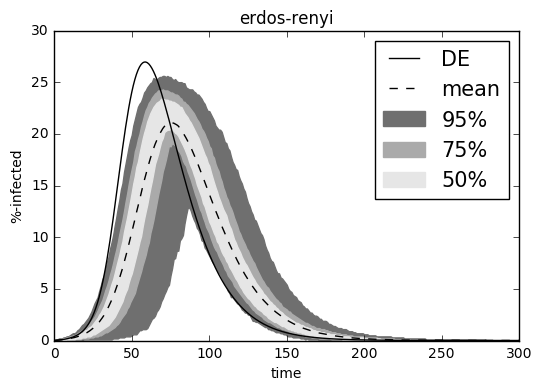

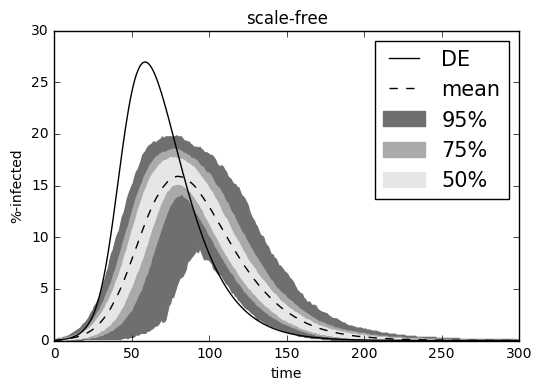

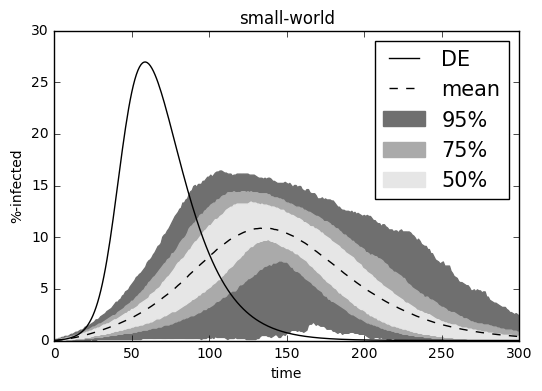

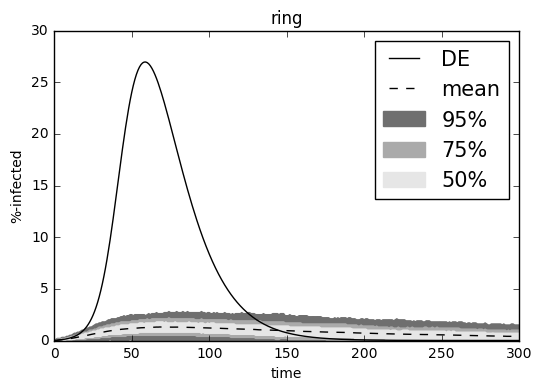

In [133]:
for network in one_city['generate-network'].unique():
    figure()
    plot(de['de-infected'] / 10., label='DE')
    ts_quantiles(one_city[one_city['generate-network'] == network])
    title(network[1:-1])
    xlabel('time')
    ylabel('%-infected')
    axis([0,300,0,30])
    savefig('one-city-{}-vs-de.pdf'.format(network[1:-1]))

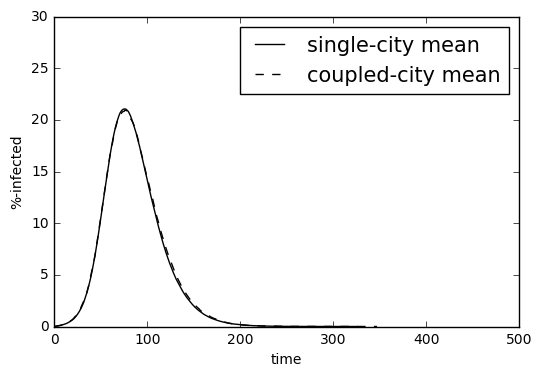

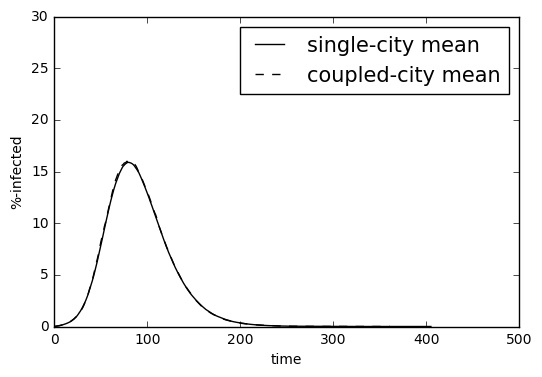

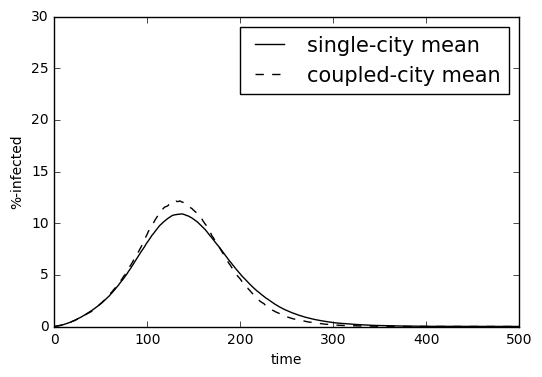

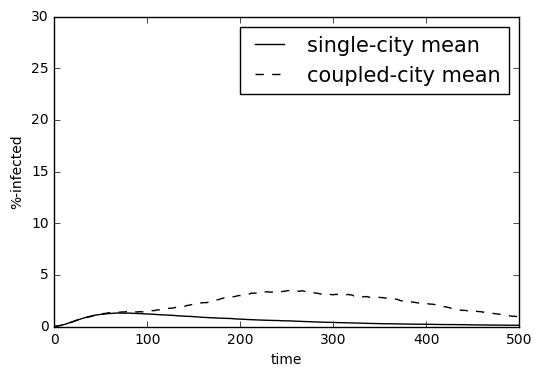

In [132]:
for network in one_city['generate-network'].unique():
    organized_single = one_city[one_city['generate-network'] == network].pivot('[step]','[run number]')['origin-infected'].fillna(0).transpose()
    organized_double = two_cities[(two_cities['focal-city-network'] == network) & (two_cities['other-city-network'] == network)].pivot('[step]','[run number]')['focal-infected'].fillna(0).transpose()
    plot(organized_single.mean() / 10., label='single-city mean')
    plot(organized_double.mean() / 10., label='coupled-city mean')
    xlabel('time')
    ylabel('%-infected')
    legend(fontsize=15)
    axis([0,500,0,30])
    savefig("single-vs-coupled-{}.pdf".format(network[1:-1]))
    figure()

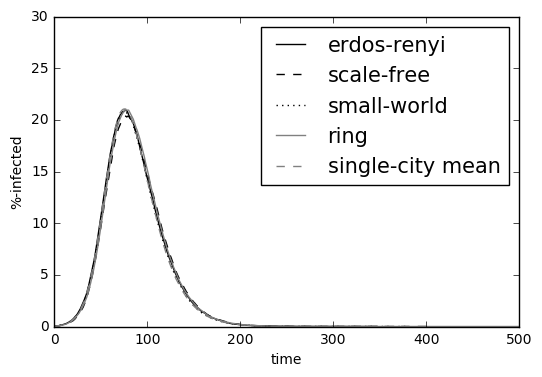

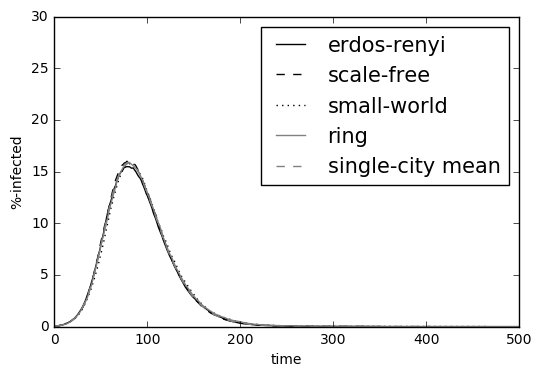

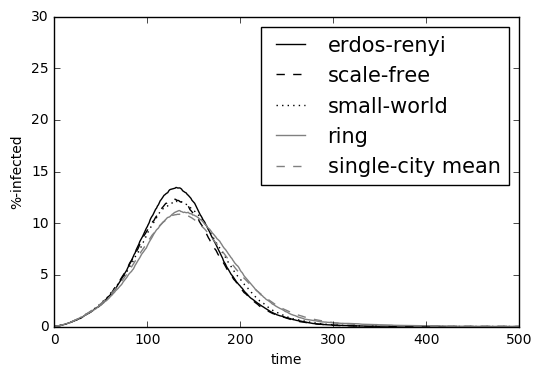

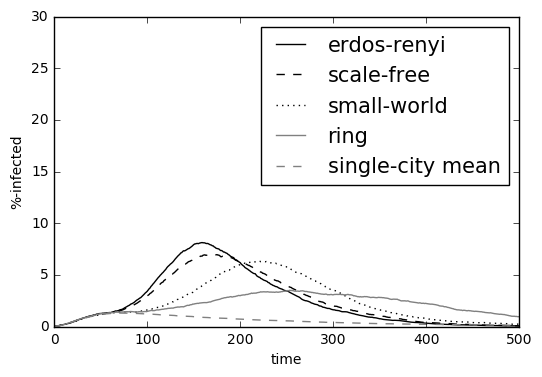

In [137]:
for focal_network in two_cities['focal-city-network'].unique():
    figure()
    organized_single = one_city[one_city['generate-network'] == focal_network].pivot('[step]','[run number]')['origin-infected'].fillna(0).transpose()

    for other_network in two_cities['other-city-network'].unique():
        organized = two_cities[(two_cities['focal-city-network'] == focal_network) & (two_cities['other-city-network'] == other_network)].pivot('[step]','[run number]')['focal-infected'].fillna(0).transpose()
        plot(organized.mean() / 10, label = other_network[1:-1])
    plot(organized_single.mean() / 10., label='single-city mean')
    xlabel('time')
    ylabel('%-infected')
    axis([0,500,0,30])
    legend(fontsize=15)
    savefig("focal-city-{}.pdf".format(focal_network[1:-1]))

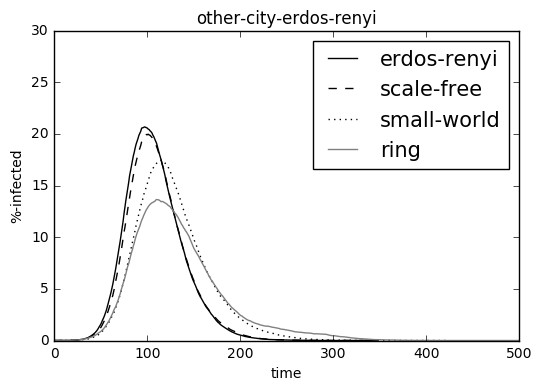

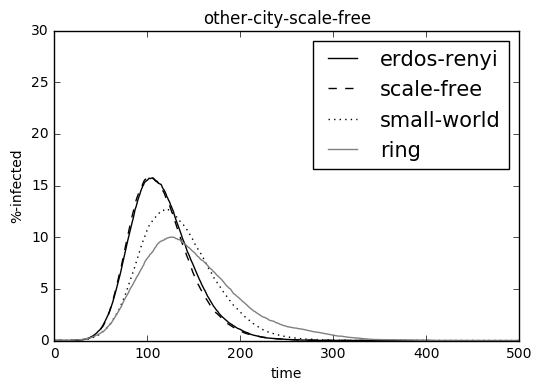

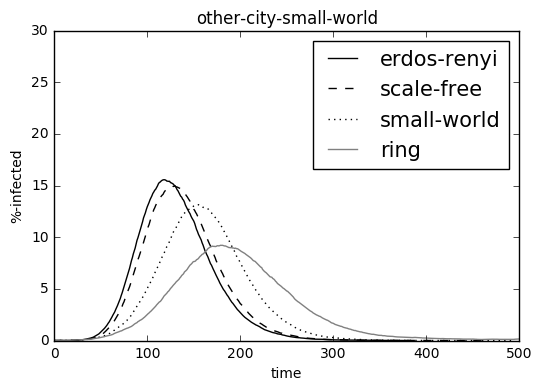

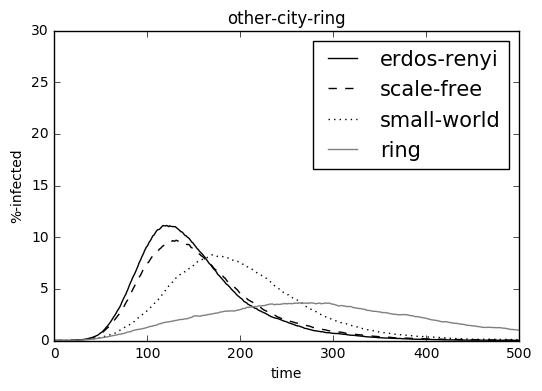

In [138]:

for other_network in two_cities['other-city-network'].unique():
    figure()
    for focal_network in two_cities['focal-city-network'].unique():
        organized = two_cities[(two_cities['focal-city-network'] == focal_network) & (two_cities['other-city-network'] == other_network)].pivot('[step]','[run number]')['other-infected'].fillna(0).transpose()
        plot(organized.mean() / 10, label = focal_network[1:-1])
        
    xlabel('time')
    ylabel('%-infected')
    title("other-city-{}".format(other_network[1:-1]))
    axis([0,500,0,30])
    legend(fontsize=15)
    savefig("other-city-{}.pdf".format(other_network[1:-1]))

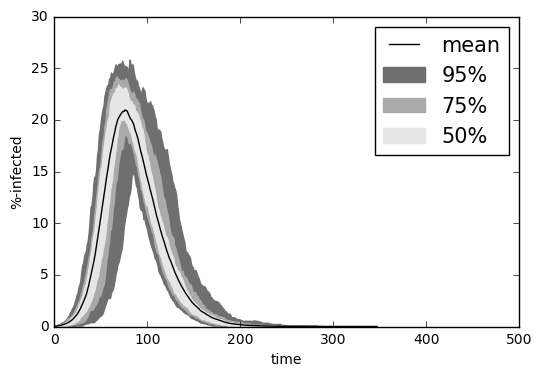

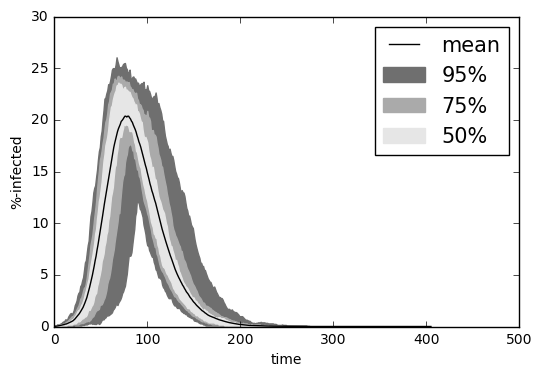

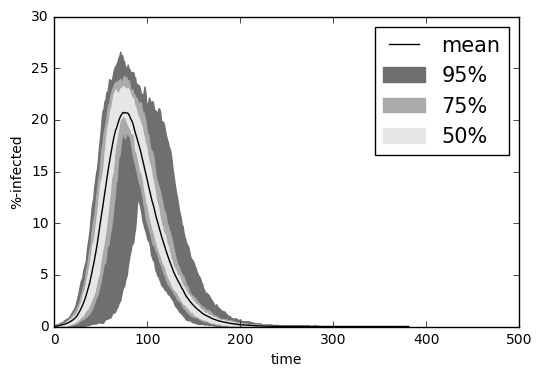

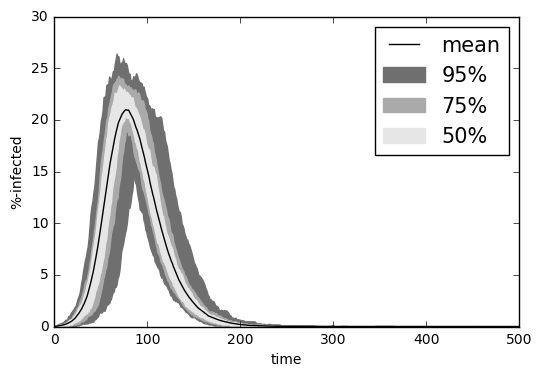

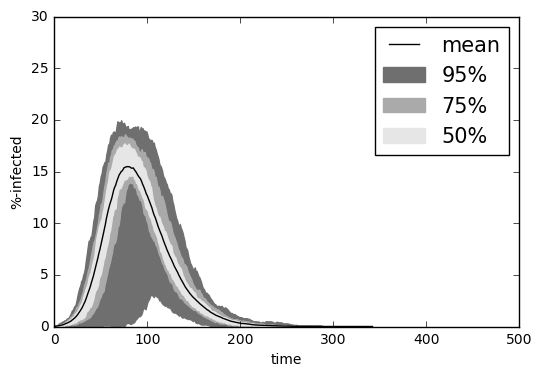

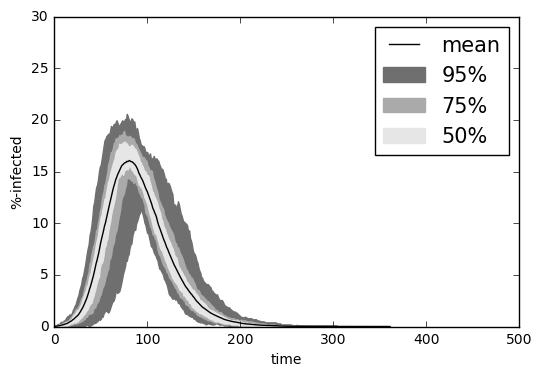

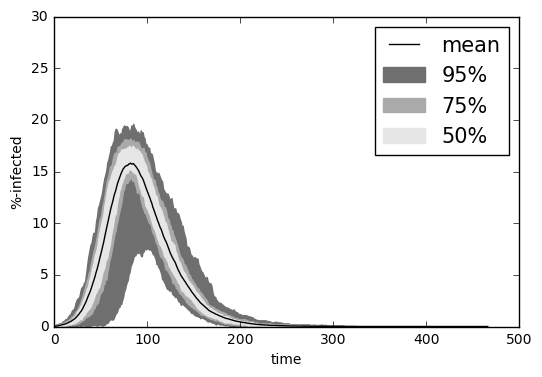

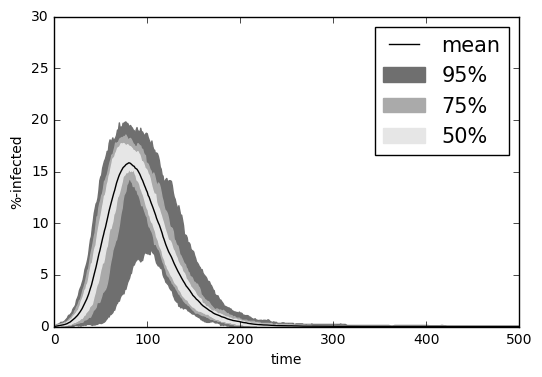

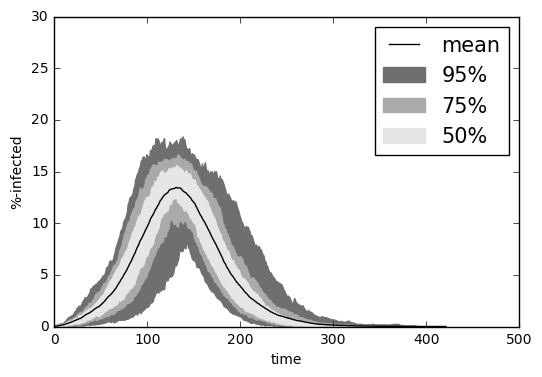

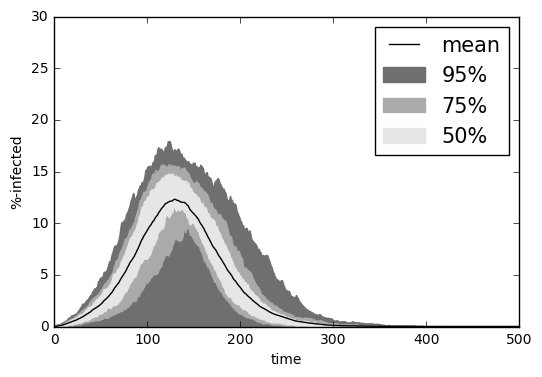

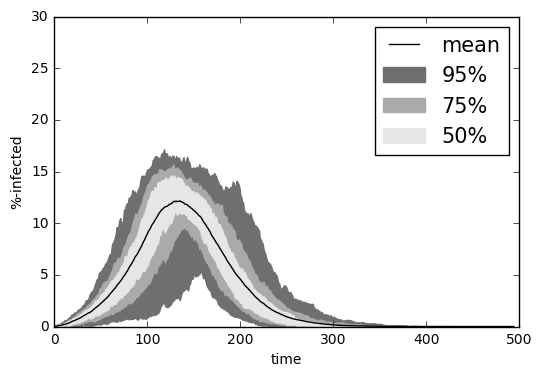

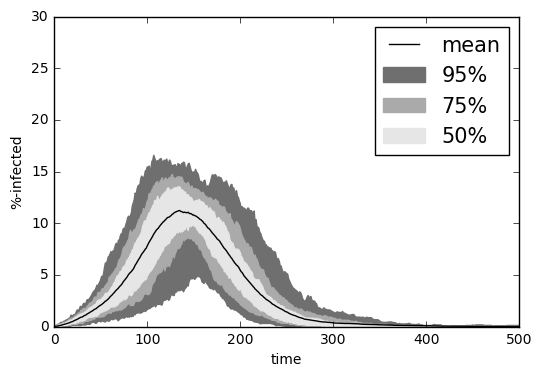

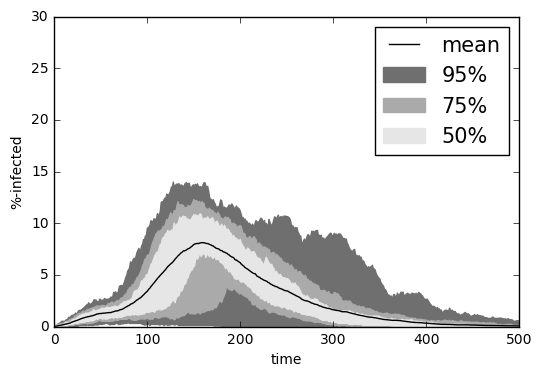

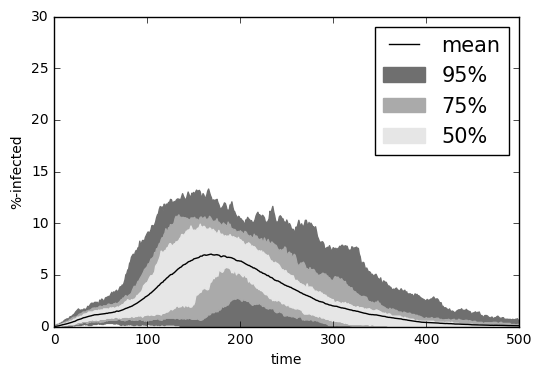

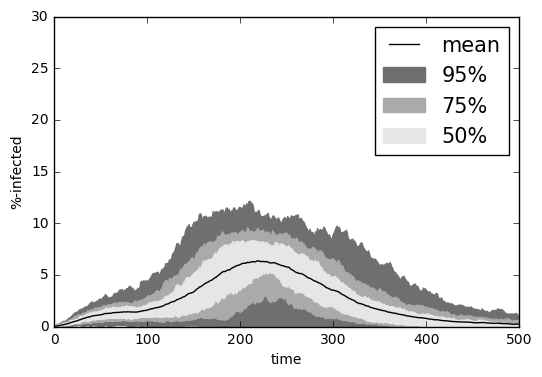

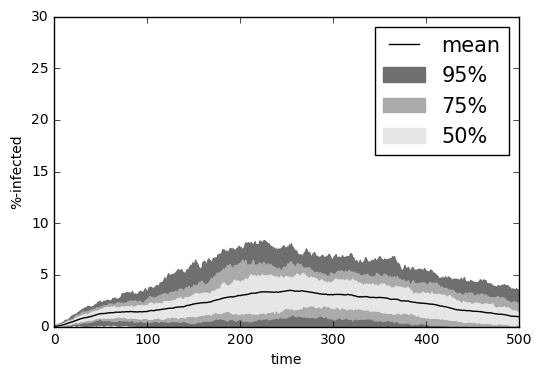

In [126]:
for focal_network in two_cities['focal-city-network'].unique():
    for other_network in two_cities['other-city-network'].unique():
        ts_quantiles(two_cities[(two_cities['focal-city-network'] == focal_network) & (two_cities['other-city-network'] == other_network)], field = 'focal-infected')
        #title("Focal city, {} and {}".format(focal_network[1:-1], other_network[1:-1]))
        xlabel('time')
        ylabel('%-infected')
        axis([0,500,0,30])
        savefig("focal-city-{}-{}.pdf".format(focal_network[1:-1], other_network[1:-1]))
        figure()

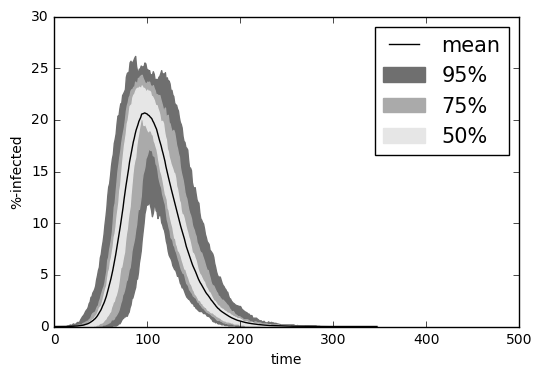

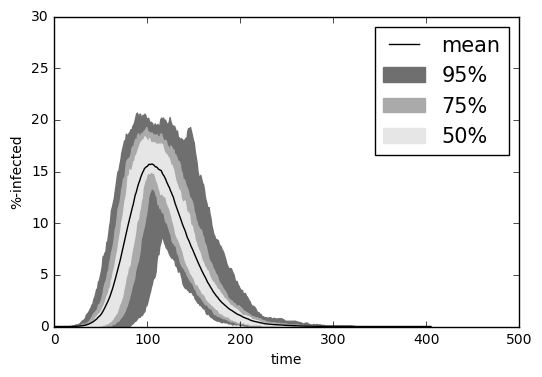

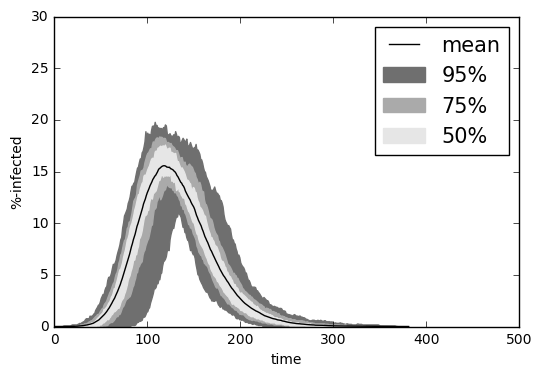

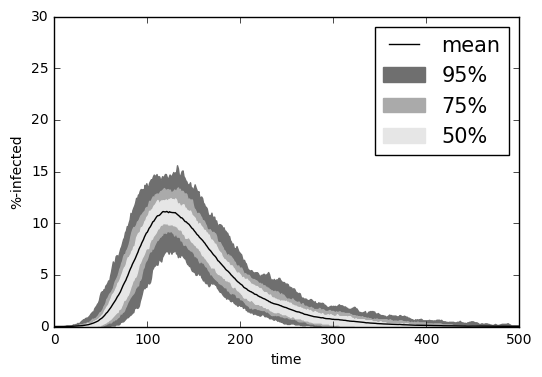

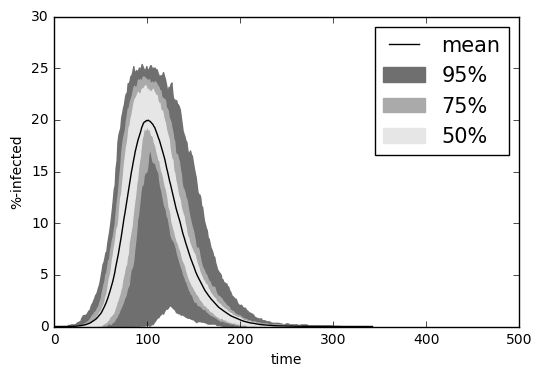

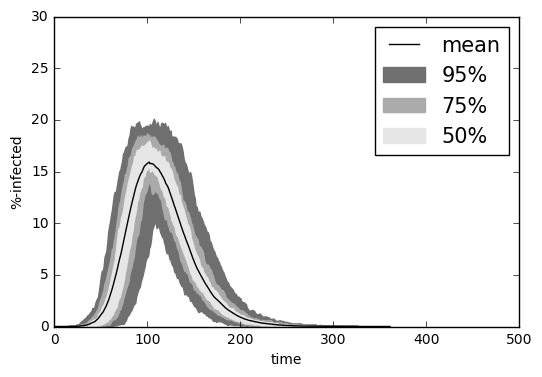

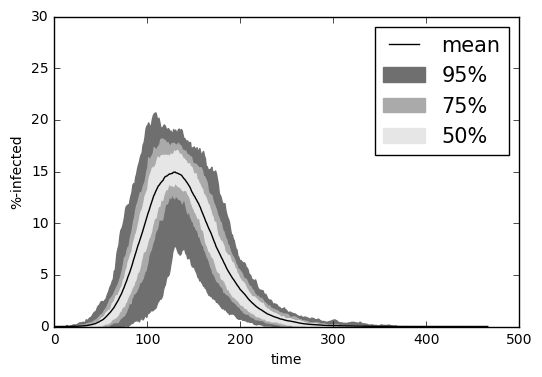

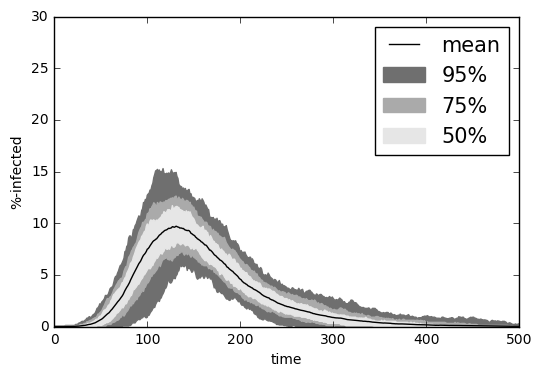

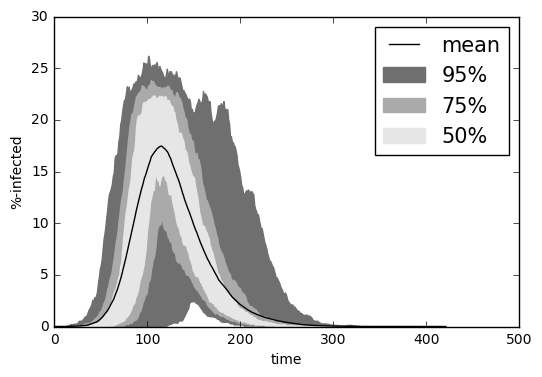

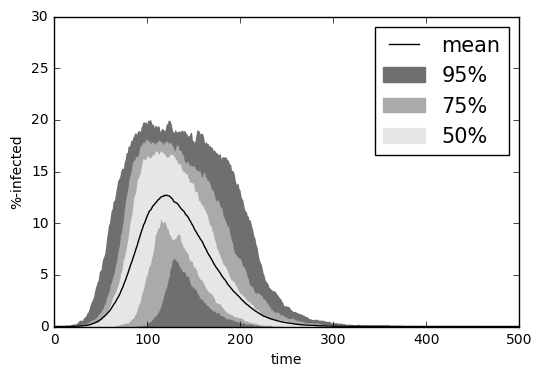

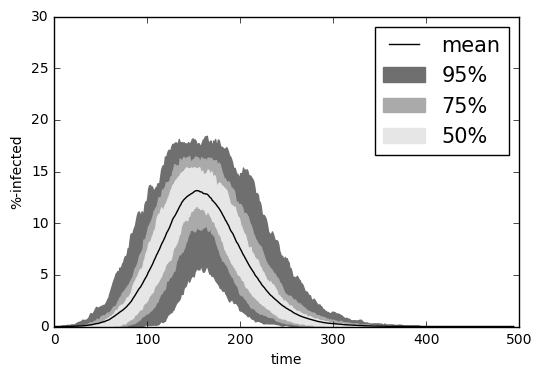

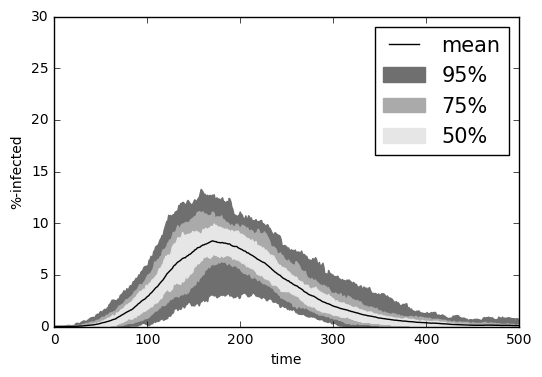

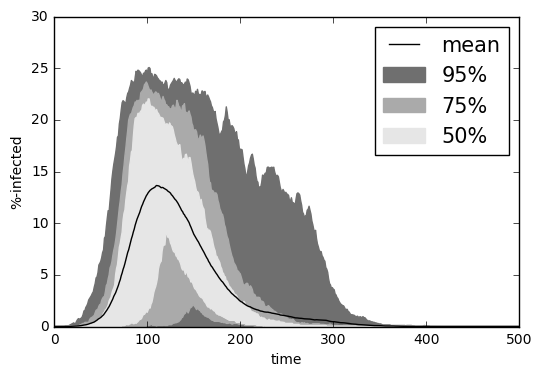

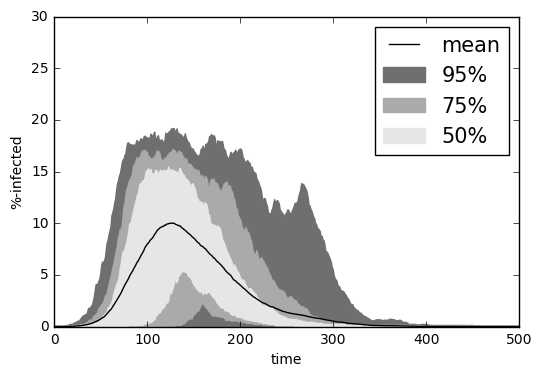

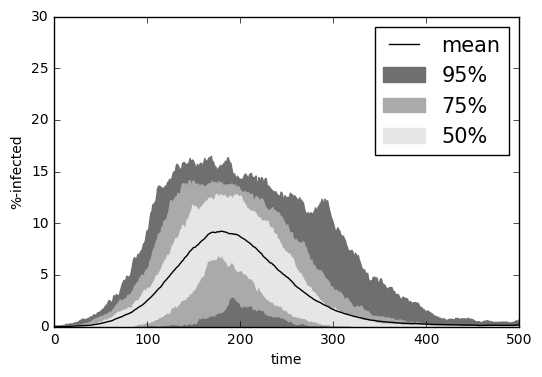

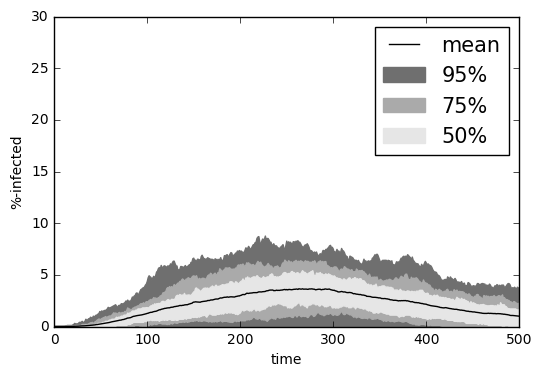

In [127]:
for focal_network in two_cities['focal-city-network'].unique():
    for other_network in two_cities['other-city-network'].unique():
        ts_quantiles(two_cities[(two_cities['focal-city-network'] == focal_network) & (two_cities['other-city-network'] == other_network)], field = 'other-infected')
        xlabel('time')
        ylabel('%-infected')
        axis([0,500,0,30])
        savefig("other-city-{}-{}.pdf".format(focal_network[1:-1], other_network[1:-1]))
        figure()

In [ ]:
5

In [229]:
len(sw_origin[(sw_origin['rewire-prob-city-2'] == 0.0) & (sw_origin['[step]'] == 100) & (sw_origin['origin-infected'] > 0)])

741

In [228]:
len(sw_origin[(sw_origin['rewire-prob-city-2'] == 0.050000000000000003) & (sw_origin['[step]'] == 100) & (sw_origin['origin-infected'] > 0)])

780

In [227]:
len(sw_origin[(sw_origin['rewire-prob-city-2'] == 1) & (sw_origin['[step]'] == 100) & (sw_origin['origin-infected'] > 0)])

780

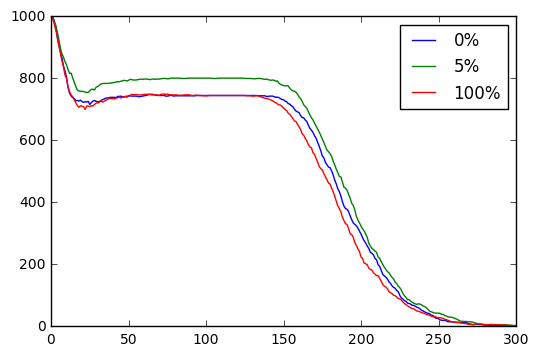

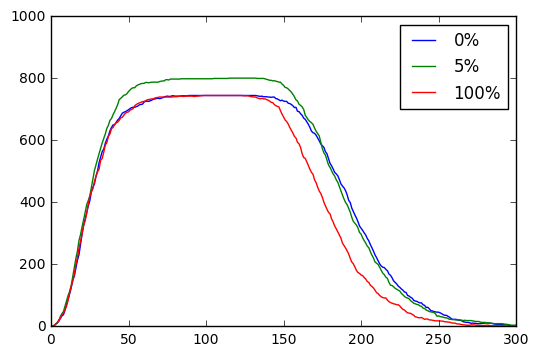

In [271]:
for rp in sorted(set(two_cities['rewire-prob-city-2'])):
    runs = ring_origin[(ring_origin['rewire-prob-city-2'] == rp) & (ring_origin['origin-infected'] > 0)]
    plot(runs.groupby('[step]')['origin-infected'].count(), label=str(int(round(rp * 100))) + '%')
    #runs.pivot('[step]','[run number]')['origin-infected'].fillna(0)
#    for r in set(runs['[run number]']):
#        run = runs[runs['[run number]'] == r]
#        plot(run['[step]'], run['origin-infected'] / 2.)
    axis([0,300,0,1000])
    legend()

figure()
for rp in sorted(set(two_cities['rewire-prob-city-2'])):
    runs = ring_origin[(ring_origin['rewire-prob-city-2'] == rp) & (ring_origin['other-infected'] > 0)]
    plot(runs.groupby('[step]')['other-infected'].count(), label=str(int(round(rp * 100))) + '%')
    #runs.pivot('[step]','[run number]')['origin-infected'].fillna(0)
#    for r in set(runs['[run number]']):
#        run = runs[runs['[run number]'] == r]
#        plot(run['[step]'], run['origin-infected'] / 2.)
    axis([0,300,0,1000])
    legend()

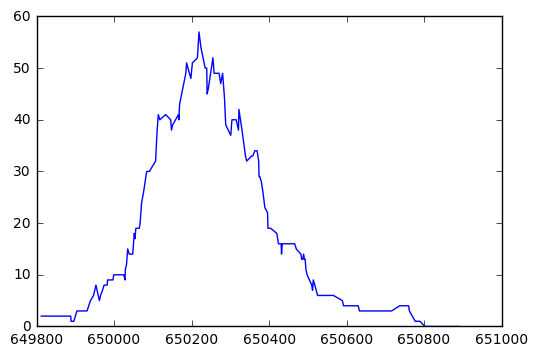

In [237]:
runs = sw_origin[sw_origin['rewire-prob-city-2'] == 0.050000000000000003]

plot(runs[runs['[run number]'] == 4001]['origin-infected'])

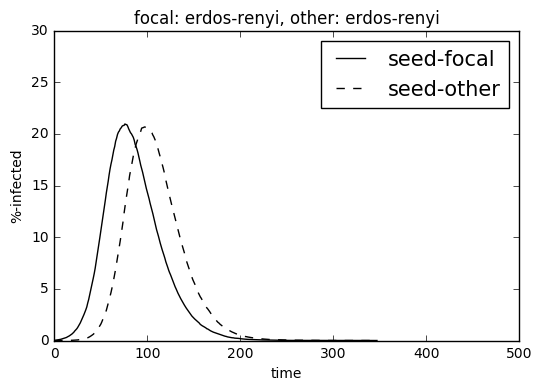

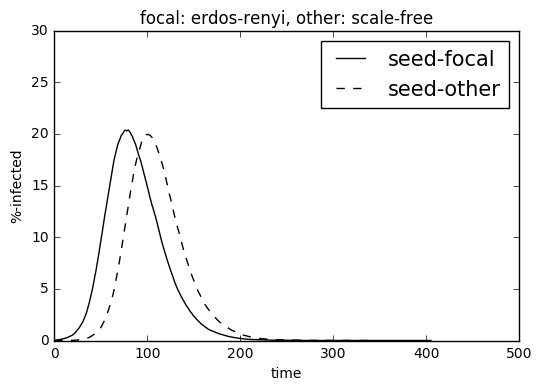

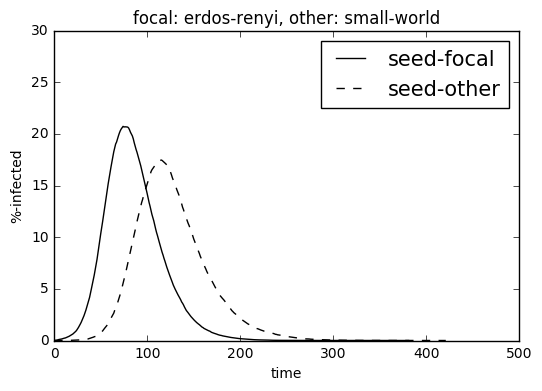

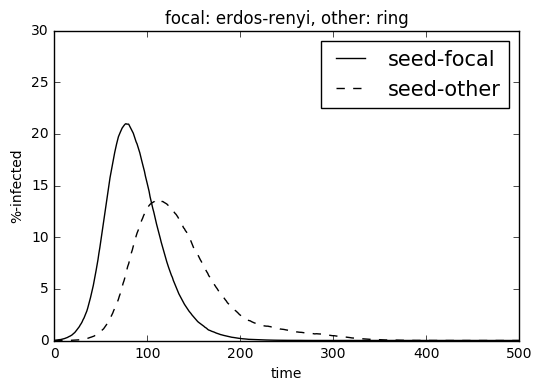

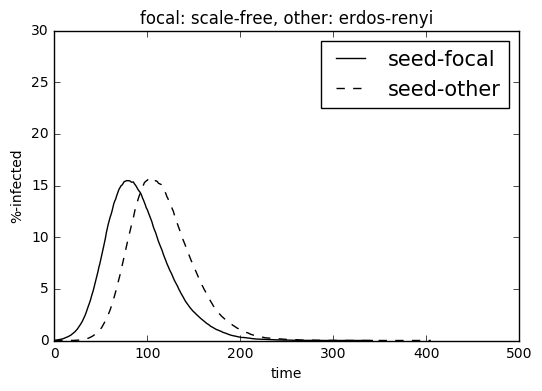

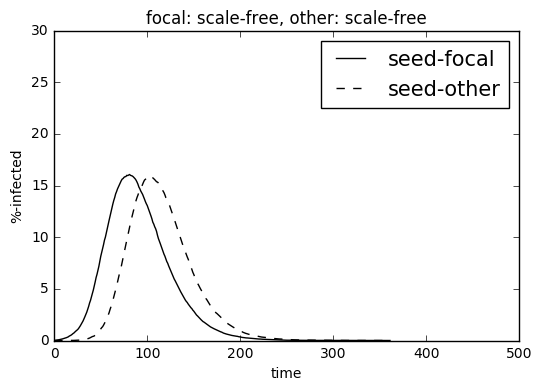

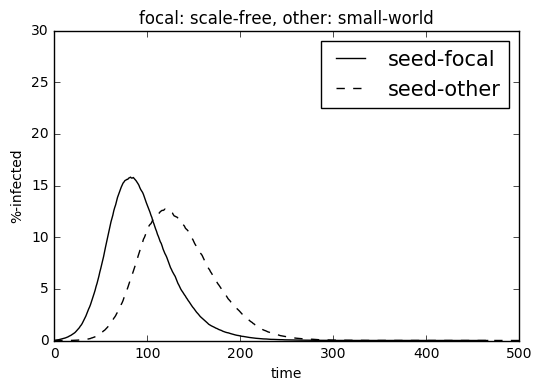

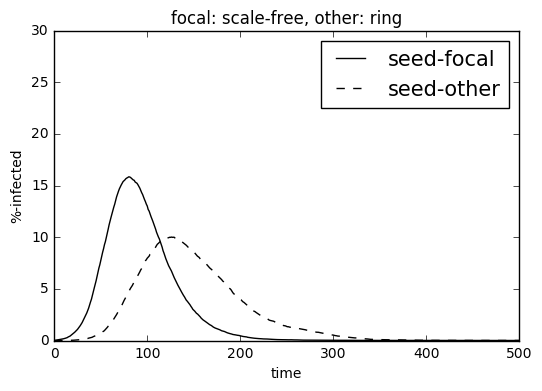

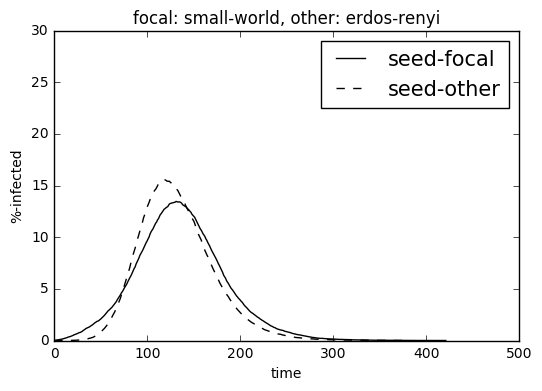

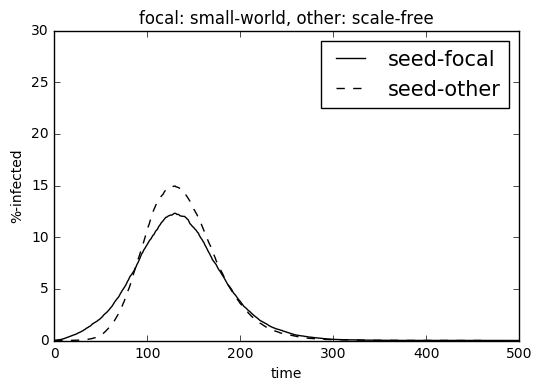

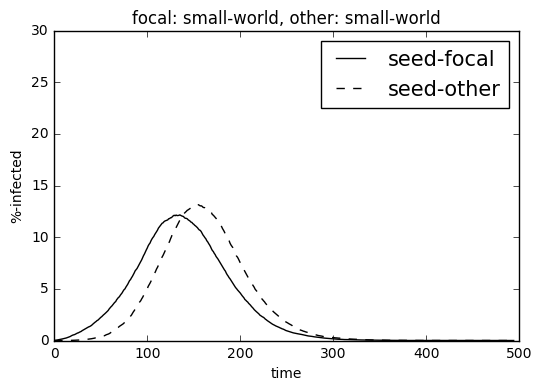

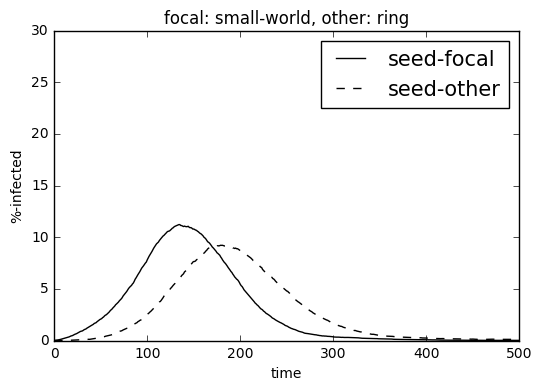

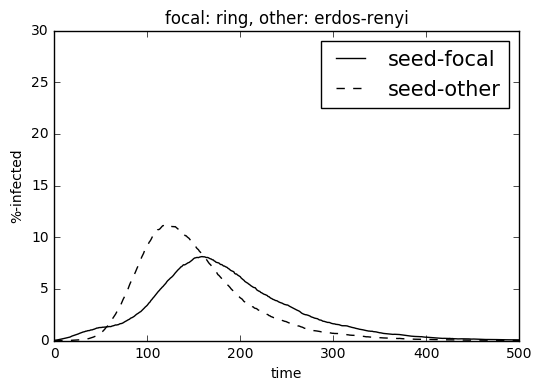

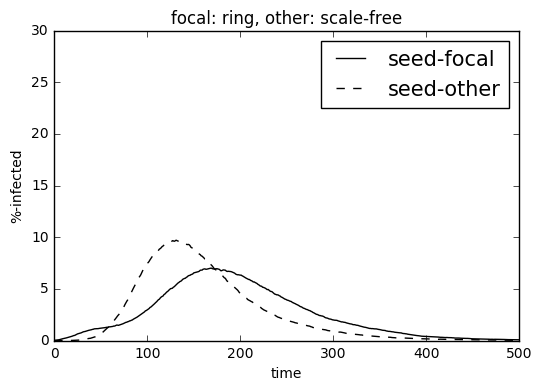

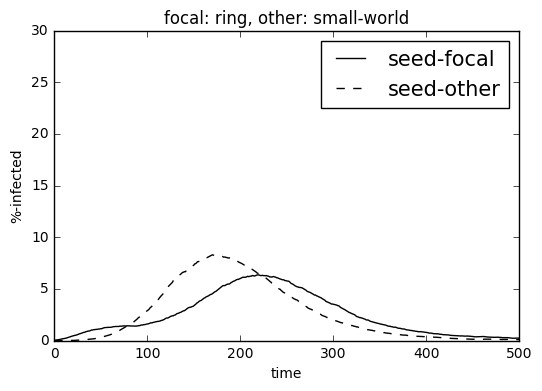

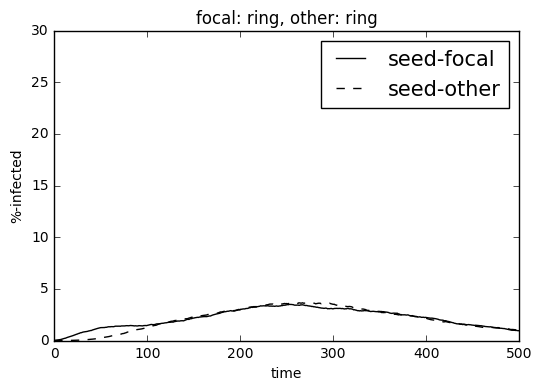

In [15]:
for focal_network in two_cities['other-city-network'].unique():
    for other_network in two_cities['focal-city-network'].unique():
        seed_focal_organized = two_cities[(two_cities['focal-city-network'] == focal_network) & (two_cities['other-city-network'] == other_network)].pivot('[step]','[run number]')['focal-infected'].fillna(0).transpose()
        
        seed_other_organized = two_cities[(two_cities['focal-city-network'] == other_network) & (two_cities['other-city-network'] == focal_network)].pivot('[step]','[run number]')['other-infected'].fillna(0).transpose()
        
        plot(seed_focal_organized.mean() / 10, label = "seed-focal")
        plot(seed_other_organized.mean() / 10, label = "seed-other")
        
        xlabel('time')
        ylabel('%-infected')
        title("focal: {}, other: {}".format(focal_network[1:-1], other_network[1:-1]))
        axis([0,500,0,30])
        legend(fontsize=15)
        savefig("focal-{}-other-{}.pdf".format(focal_network[1:-1], other_network[1:-1]))
        figure()